**KNN**

According to this algorithm, which is used in classification, feature extraction during classification is used to look at the closeness of the new individual to be categorized to k of the previous individuals.
For example, you want to classify a new element for k = 3. in this case the nearest 3 of the old classified elements are taken. If these elements are included in the class, the new element is also included in that class. The euclide distance can be used in the distance calculation.

# Project - Classify Type of Patient from the biomechanical features of orthopedic patients.

# Install the necessary libraries


In [2]:
from scipy import stats 
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# import data 2C_weka.csv for 2 Class Classifcation.


In [90]:
dfBioData = pd.read_csv("/home/amol/GL/LabML/Residency2/projectassignment/SupervisedLearning/2Classdata.csv")

# Explore the data set.Get necessary information about the data.

Look at the head and tail of dataset.
Find the missing value.
Look at the unique values of class values.
Look at the distribution of class values and other attributes.
Get the datatype information about the dataset
Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization.

In [91]:
dfBioData.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [92]:
#df.dtypes
dfBioData.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [93]:
#Function to check if any column has null values
def CheckifNullExists(sr) :
    if (sr.isnull().sum() >0) :
        return ("Column" + " " + "'" + sr.name + "'" + " " + "has " + sr.isnull().sum() + " values")
    else :
        return ("Column" + " " + "'" + sr.name + "'" + " " + "has no null values")

In [94]:
# Check if any column has null values
for (columnName, columnData) in dfBioData.iteritems():
    print(CheckifNullExists (columnData))

Column 'pelvic_incidence' has no null values
Column 'pelvic_tilt numeric' has no null values
Column 'lumbar_lordosis_angle' has no null values
Column 'sacral_slope' has no null values
Column 'pelvic_radius' has no null values
Column 'degree_spondylolisthesis' has no null values
Column 'class' has no null values


Above result shows that there null value in any of the column

In [102]:
#Below method also shows no null data
dfBioData.isnull().sum()

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

# Encode the Class variable to integer.

In [95]:
dfBioData['class'].value_counts()

Abnormal    210
Normal      100
Name: class, dtype: int64

In [96]:
#Lets write function to encode Class variable
def ClassToInt (classval):
    if (classval =='Abnormal') :
        return 1
    elif (classval=='Normal') :
        return 2

In [97]:
dfBioData['class'] = dfBioData['class'].map(ClassToInt)

In [98]:
dfBioData['class'].value_counts()   # Class variable is encoded to integer: Abnormal -1, Normal -2

1    210
2    100
Name: class, dtype: int64

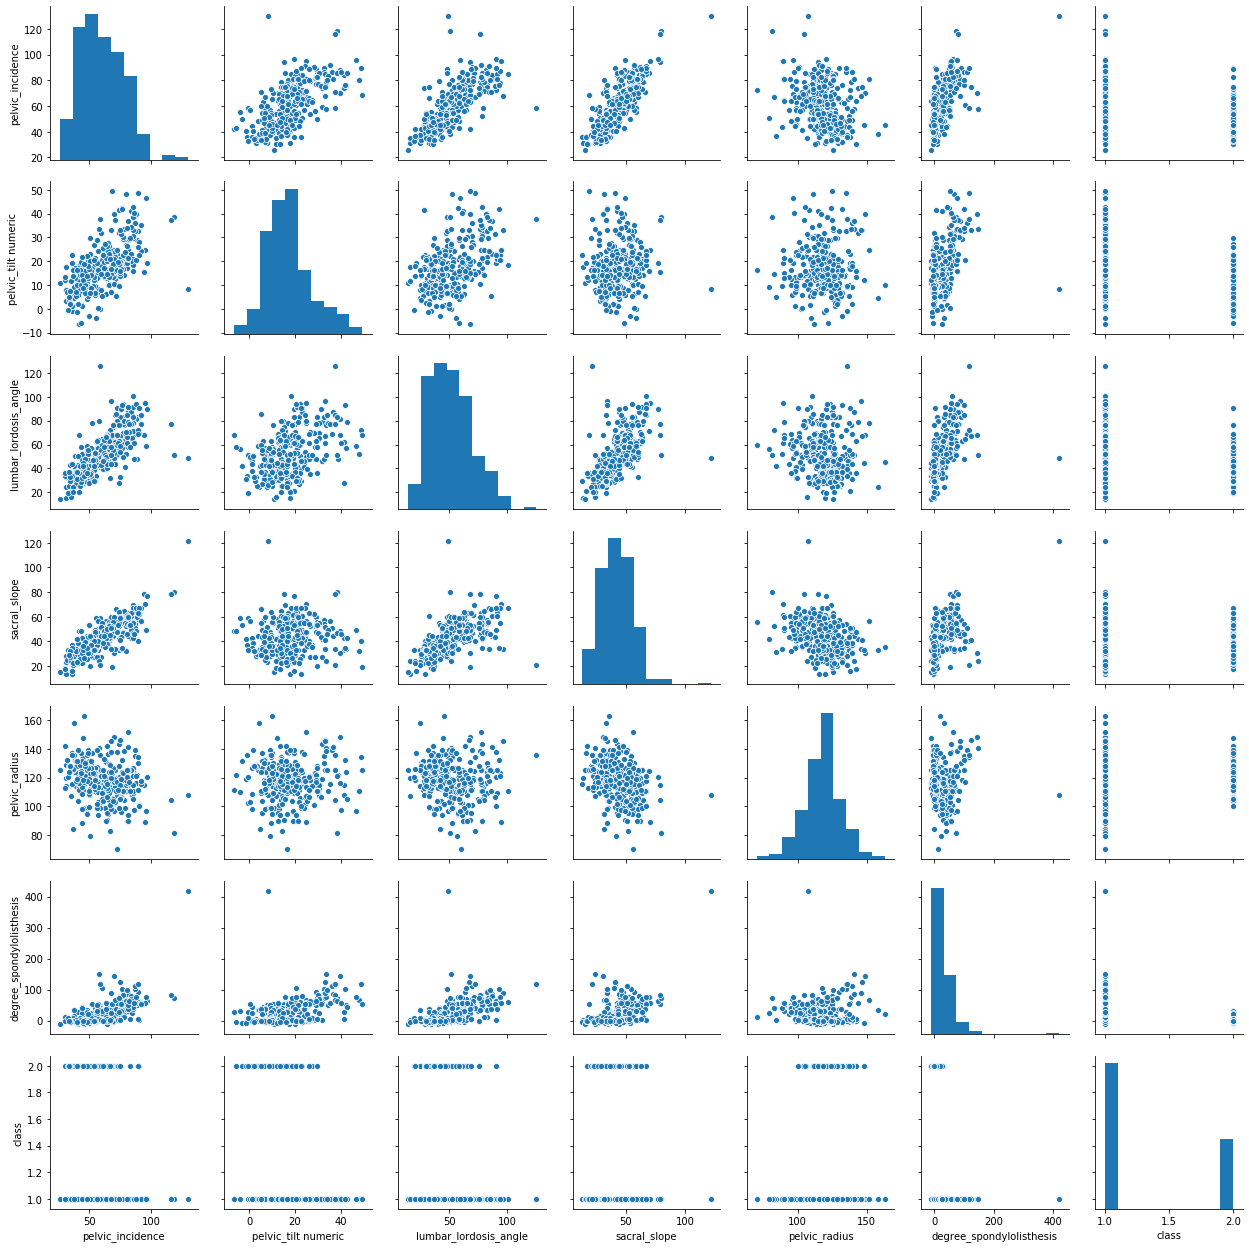

In [99]:
#Lets check data relationship
sns.pairplot(dfBioData)

In [100]:
dfBioData.corr()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
pelvic_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743,-0.353336
pelvic_tilt numeric,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862,-0.326063
lumbar_lordosis_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667,-0.312484
sacral_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557,-0.210602
pelvic_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065,0.309857
degree_spondylolisthesis,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000,-0.443687
class,-0.353336,-0.326063,-0.312484,-0.210602,0.309857,-0.443687,1.000000


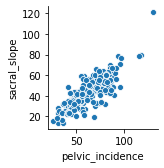

In [111]:
sns.pairplot(dfBioData[dfBioData['class']==1],x_vars='pelvic_incidence',y_vars='sacral_slope')

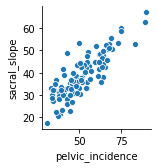

In [112]:
sns.pairplot(dfBioData[dfBioData['class']==2],x_vars='pelvic_incidence',y_vars='sacral_slope')

# Create the X(Feature-set) and Y(Target-set) sets for your Data.

In [101]:
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [115]:
dfBioData_temp = dfBioData

In [116]:
# Create dataframe with features...except 'class' field let consider all columsn as features

dfBioData_feature = dfBioData_temp.drop(labels='class', axis = 1)

# Normalize your Data (X) to get values between 0 to 1.

In [118]:
#Standardise data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [121]:
BioData_feature_normal = scaler.fit_transform(dfBioData_feature)

In [124]:
dfBioData_feature_normal = pd.DataFrame(BioData_feature_normal,columns=dfBioData_temp.columns[0:-1])

# Split the dat as train and test with a ratio of 70:30.

In [129]:
# Read the label - 'class' into some variable
BioData_feature_Lables = dfBioData_temp['class']

# store labels into array
BioData_feature_Y = np.array(BioData_feature_Lables)
#feature data into array
BioData_feature_X = np.array(dfBioData_feature_normal)

In [142]:
# Spli data into train and test set
dfBioData_train, dfBioData_test, y_train, y_test = train_test_split(BioData_feature_X, 
                                                                                    BioData_feature_Y,
                                                                                    test_size=0.3,                                                                         
                                                                                    random_state=1,                                                                
                                                                                    stratify=dfBioData_temp['class'])

# Build the KNN model using Train Dataset and predict the class on test dataset.

In [145]:
#lets build model for different values of k and check which is ptimum value
for k in list([1,3,5,9,12,15,17,19,21,23,25]) :
    BioData_model = KNeighborsClassifier(n_neighbors=k)
    BioData_model.fit(dfBioData_train,y_train)
    #predict class values
    class_predict = BioData_model.predict(dfBioData_test)
    #accuracy score to check how many test cases were correctly predicted out of total test cases
    print("Accuracy Score when k=",k,""" is """,BioData_model.score(dfBioData_test, y_test))

Accuracy Score when k= 1  is  0.7956989247311828
Accuracy Score when k= 3  is  0.7956989247311828
Accuracy Score when k= 5  is  0.8172043010752689
Accuracy Score when k= 9  is  0.8494623655913979
Accuracy Score when k= 12  is  0.8817204301075269
Accuracy Score when k= 15  is  0.8602150537634409
Accuracy Score when k= 17  is  0.8709677419354839
Accuracy Score when k= 19  is  0.8602150537634409
Accuracy Score when k= 21  is  0.8817204301075269
Accuracy Score when k= 23  is  0.8817204301075269
Accuracy Score when k= 25  is  0.8817204301075269


# Calculate the performance score of of your classification on test dataset.
Hint- You can use knn.score( ) function.

In [0]:
# This is done in above section

# What is the best K value for your classifcation?
#Find at which k value you get the best score.

In [152]:
# creating add list of K for KNN
myList  = list(range(1,25,2))

# empty list that will hold cv scores
cv_scores = []
k_neighbors = []

# perform 10-fold cross validation
for k in myList:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, dfBioData_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    k_neighbors.append(k)
    
MSE = [1-x for x in cv_scores]
min(MSE)
MSE.index(min(MSE))
best_k = myList[MSE.index(min(MSE))]
print('The optimal number of neighbors is %d' % best_k)

The optimal number of neighbors is 1


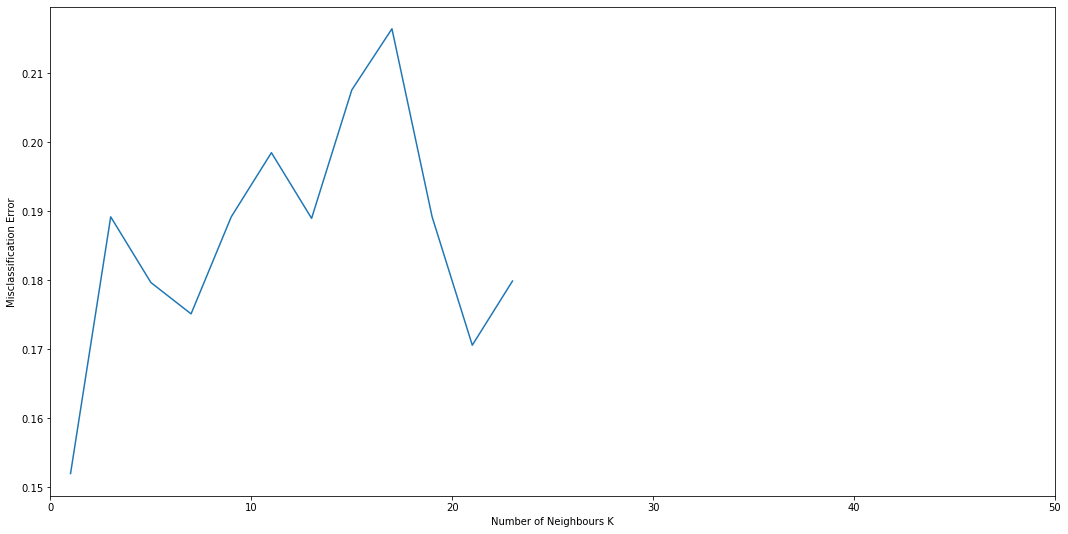

In [148]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 18
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

plt.xlim(0,50)

# plot misclassification error vs k
plt.plot(k_neighbors, MSE)
plt.xlabel('Number of Neighbours K')
plt.ylabel('Misclassification Error')
plt.show()

# import data 3C_weka.csv for 3 Class Classifcation and repeat all the steps which are given above.

In [156]:
dfBioData_1 = pd.read_csv("/home/amol/GL/LabML/Residency2/projectassignment/SupervisedLearning/3Classdata.csv")

In [159]:
dfBioData_1.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [161]:
dfBioData_1['class'].value_counts()

Spondylolisthesis    150
Normal               100
Hernia                60
Name: class, dtype: int64

In [162]:
#Below method also shows no null data
dfBioData_1.isnull().sum()

pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [167]:
#Lets write function to encode Class variable
def ClassToInt_1 (classval):
    if (classval =='Spondylolisthesis') :
        return 1
    elif (classval=='Normal') :
        return 2
    elif (classval =='Hernia') :
        return 3

In [168]:
dfBioData_1['class'] = dfBioData_1['class'].map(ClassToInt_1)

dfBioData_1['class'].value_counts()  #class variable is encoded to integer: Spondylolisthesis -1, Normal -2, Hernia-2

1    150
2    100
3     60
Name: class, dtype: int64

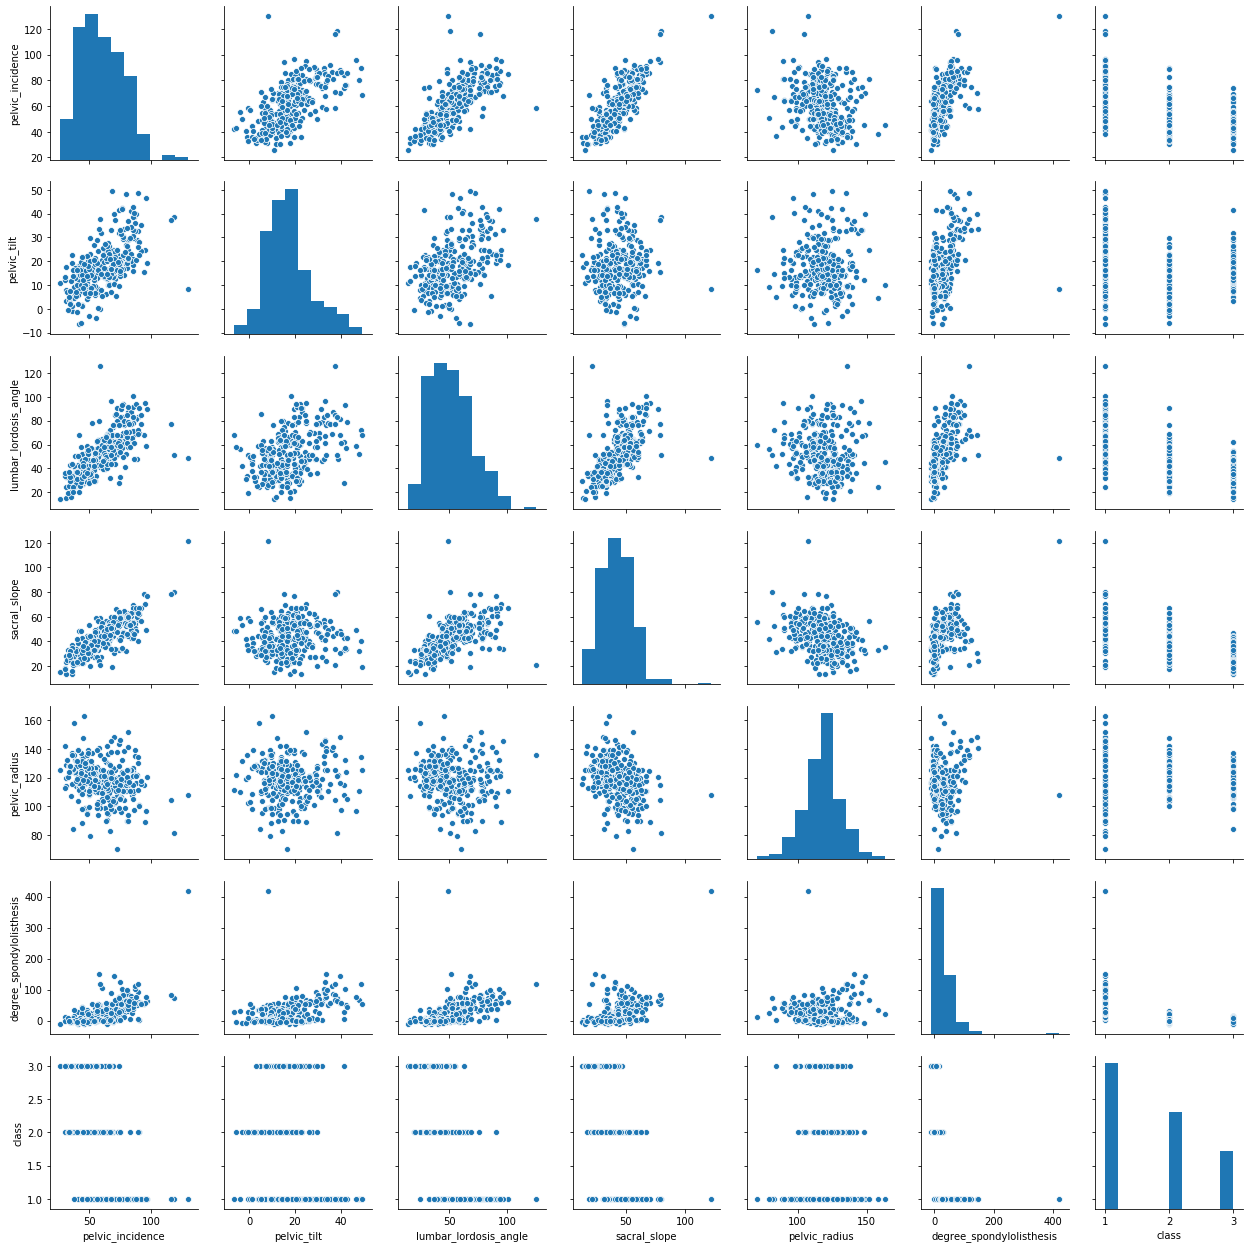

In [169]:
 #Lets check data relationship
sns.pairplot(dfBioData_1)

In [170]:
dfBioData_1.corr()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
pelvic_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743,-0.590025
pelvic_tilt,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862,-0.205158
lumbar_lordosis_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667,-0.636490
sacral_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557,-0.604681
pelvic_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065,0.133424
degree_spondylolisthesis,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000,-0.588541
class,-0.590025,-0.205158,-0.636490,-0.604681,0.133424,-0.588541,1.000000


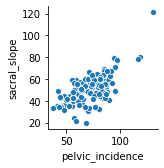

In [171]:
sns.pairplot(dfBioData_1[dfBioData_1['class']==1],x_vars='pelvic_incidence',y_vars='sacral_slope')

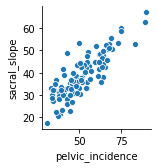

In [172]:
sns.pairplot(dfBioData_1[dfBioData_1['class']==2],x_vars='pelvic_incidence',y_vars='sacral_slope')

In [174]:
dfBioData_temp = dfBioData_1

# Create dataframe with features...except 'class' field let consider all columsn as features

dfBioData_feature = dfBioData_temp.drop(labels='class', axis = 1)

In [175]:
#Standardise data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

BioData_feature_normal = scaler.fit_transform(dfBioData_feature)

dfBioData_feature_normal = pd.DataFrame(BioData_feature_normal,columns=dfBioData_temp.columns[0:-1])

# Read the label - 'class' into some variable
BioData_feature_Lables = dfBioData_temp['class']

# store labels into array
BioData_feature_Y = np.array(BioData_feature_Lables)
#feature data into array
BioData_feature_X = np.array(dfBioData_feature_normal)

# Let devide data into train and test set
dfBioData_train, dfBioData_test, y_train, y_test = train_test_split(BioData_feature_X, 
                                                                    BioData_feature_Y,
                                                                    test_size=0.3,                                                                         
                                                                    random_state=1,                                                             
                                                                    stratify=dfBioData_temp['class'])

In [176]:
#lets build model for different values of k and check which is ptimum value
for k in list([1,3,5,9,12,15,17,19,21,23,25]) :
    BioData_model = KNeighborsClassifier(n_neighbors=k)
    BioData_model.fit(dfBioData_train,y_train)
    #predict class values
    class_predict = BioData_model.predict(dfBioData_test)
    #accuracy score to check how many test cases were correctly predicted out of total test cases
    print("Accuracy Score when k=",k,""" is """,BioData_model.score(dfBioData_test, y_test))

Accuracy Score when k= 1  is  0.7741935483870968
Accuracy Score when k= 3  is  0.7311827956989247
Accuracy Score when k= 5  is  0.7526881720430108
Accuracy Score when k= 9  is  0.7956989247311828
Accuracy Score when k= 12  is  0.7526881720430108
Accuracy Score when k= 15  is  0.7311827956989247
Accuracy Score when k= 17  is  0.7419354838709677
Accuracy Score when k= 19  is  0.7526881720430108
Accuracy Score when k= 21  is  0.7526881720430108
Accuracy Score when k= 23  is  0.7419354838709677
Accuracy Score when k= 25  is  0.7526881720430108


In [177]:
# creating add list of K for KNN
myList  = list(range(1,25,2))

# empty list that will hold cv scores
cv_scores = []
k_neighbors = []

# perform 10-fold cross validation
for k in myList:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, dfBioData_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    k_neighbors.append(k)
    
MSE = [1-x for x in cv_scores]
min(MSE)
MSE.index(min(MSE))
best_k = myList[MSE.index(min(MSE))]
print('The optimal number of neighbors is %d' % best_k)

The optimal number of neighbors is 17


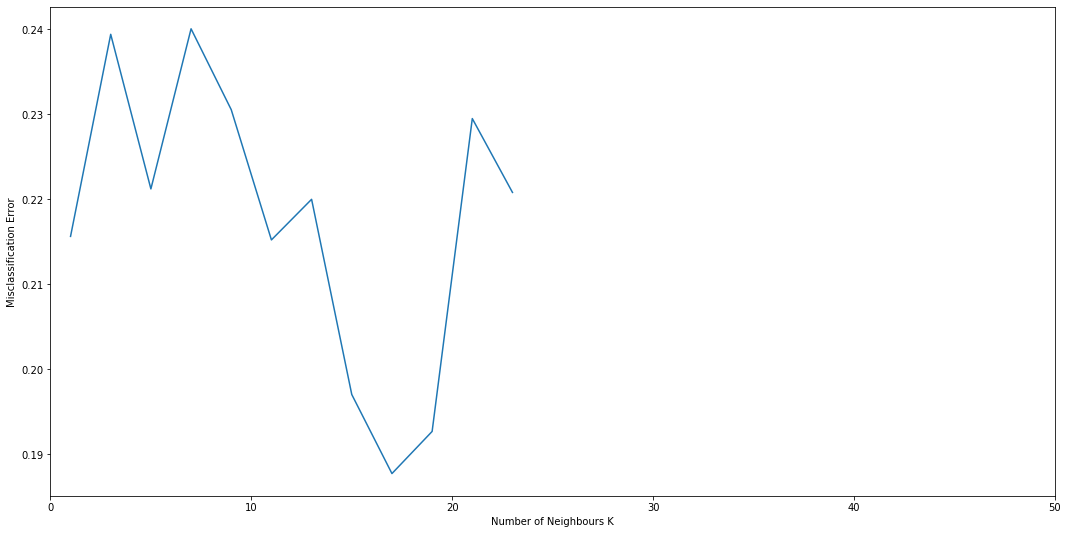

In [178]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 18
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

plt.xlim(0,50)

# plot misclassification error vs k
plt.plot(k_neighbors, MSE)
plt.xlabel('Number of Neighbours K')
plt.ylabel('Misclassification Error')
plt.show()

In [ ]:
#Above graph shows that the least errir is 17